                    EN2550 - FUNDAMENTALS OF IMAGE PROCESSING AND MACHINE VISION
190413D NIFLA M.N.F.
ASSIGNMENT 01

Q1) According to the  given intensity transformation there are only changes in the region 50-150. In that region the colors will be more brighter than what is in originally.

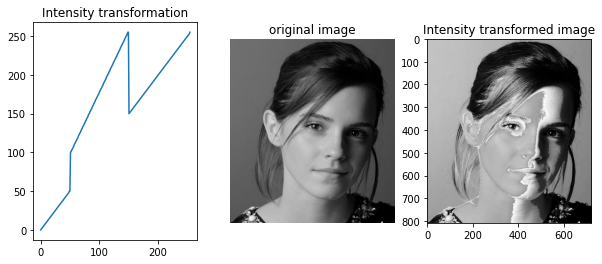

In [37]:
%matplotlib inline
import cv2 as cv
import numpy as np
import math
import matplotlib.pyplot as plt

im=cv.imread(r'Images/emma_gray.jpg',cv.IMREAD_GRAYSCALE)
t1=np.linspace(0,50,50)
t2=np.linspace(50,100,1)
t3=np.linspace(100,255,99)
t4=np.linspace(255,150,1)
t5=np.linspace(150,255,105)
t=np.concatenate((t1,t2,t3,t4,t5),axis=0).astype(np.uint8)
assert len(t)==256
g=cv.LUT(im,t)
f,ax=plt.subplots(1,3,figsize=(10,4))                    
ax[0].plot(t)
ax[0].set_title("Intensity transformation")
ax[1].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[1].set_title("original image")
ax[1].axis('off')
ax[2].imshow(cv.cvtColor(g, cv.COLOR_BGR2RGB))
ax[2].set_title("Intensity transformed image")
plt.show()

Q2) White pixels are enhanced in the figure for white matter and gray pixels of the original image is extracted in gray matter image. A step transformation is used for this purpose.

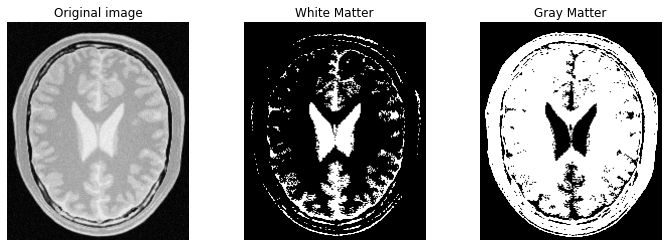

In [38]:
im=cv.imread(r'Images/brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
#Extracting White Matters
t1=np.linspace(0,0,200)
t2=np.linspace(0,255,1)
t3=np.linspace(255,255,55)
tw=np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
assert len(tw)==256
gw=cv.LUT(im,tw)

#Extracting Gray Matters
t3=np.linspace(0,0,35)
t4=np.linspace(0,255,1)
t5=np.linspace(255,255,170)
t6=np.linspace(255,0,1)
t7=np.linspace(0,0,49)
tg=np.concatenate((t3,t4,t5,t6,t7),axis=0).astype(np.uint8)
assert len(tg)==256
gg=cv.LUT(im,tg)
fig,ax=plt.subplots(1,3,sharex='all',sharey='all',figsize=(12,4))
ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0].set_title("Original image")
ax[1].imshow(cv.cvtColor(gw, cv.COLOR_BGR2RGB))
ax[1].set_title("White Matter")
ax[2].imshow(cv.cvtColor(gg, cv.COLOR_BGR2RGB))
ax[2].set_title("Gray Matter")
for i in range(3):
    ax[i].axis('off')
plt.show()

Q3) L,a,b color space represents Lightness, Red/Green value, Blue/ Yellow value of the image. Here we only change the L space. Therefore the brightness of the image is effected.

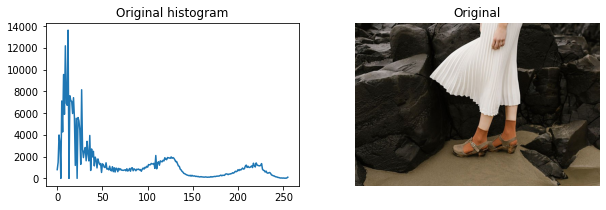

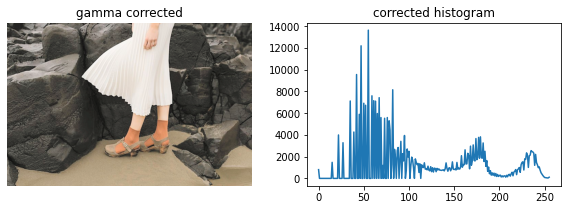

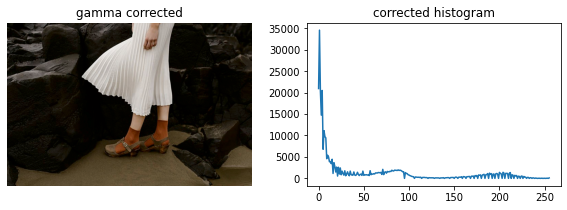

In [39]:

imgRgb=cv.imread('Images/highlights_and_shadows.jpg',cv.IMREAD_COLOR)
assert imgRgb is not None
Lab=cv.cvtColor(imgRgb,cv.COLOR_BGR2LAB)
l,a,b=cv.split(Lab)
hist_Lab=cv.calcHist([Lab],[0],None,[256],[0,256])
fig,ax=plt.subplots(1,2,figsize=(10,3))
ax[0].plot(hist_Lab)
ax[0].set_title('Original histogram')
ax[1].imshow(cv.cvtColor(imgRgb,cv.COLOR_BGR2RGB))
ax[1].set_title("Original")
ax[1].axis('off')
plt.show()

gamma=[0.5,1.5]
for gam in gamma:
    t= np.array([(p/255)**gam*255 for p in range(0,256)]).astype(np.uint8)
    newL=cv.LUT(l,t)
    labNew=cv.merge([newL,a,b])
    imgNew=cv.cvtColor(labNew,cv.COLOR_LAB2BGR)
    hist_Lab=cv.calcHist([labNew],[0],None,[256],[0,256])

    fig,ax=plt.subplots(1,2,figsize=(10,3))
    ax[0].imshow(cv.cvtColor(imgNew,cv.COLOR_BGR2RGB))
    ax[0].set_title("gamma corrected")
    ax[0].axis('off')
    ax[1].plot(hist_Lab)
    ax[1].set_title('corrected histogram')
    plt.show()
    


With the increasing gamma the pixel values are narrowed to a small range in the dark region.  

Q4) Histogram equalization spreads out the values of the pixels to a wider range hence enhance the image quality. Here we can clearly observe most of the shadows are presented in the equalized image.

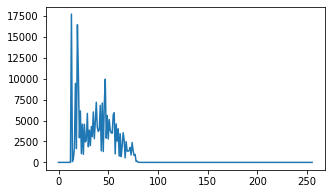

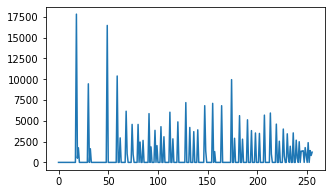

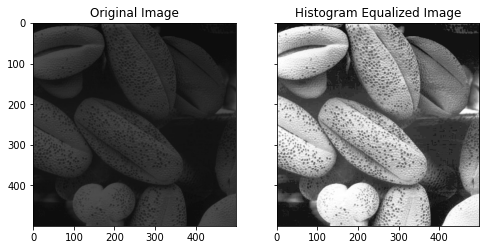

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread('Images/shells.png',cv.IMREAD_GRAYSCALE)
img_flatten=img.flatten()
#histogram
def histogram(image,length,title):
    indexes=np.linspace(0,255,256).reshape(256,1).astype(int)
    pixels=np.append(indexes,np.zeros((256,1)),axis=1).astype(int)
    for j in range(length):
        pixels[int(image[j]),1]+=1 #increase the count when perticular color pixel detected
    plt.figure(figsize=(5,3))
    plt.plot(pixels[:,0],pixels[:,1])
    plt.show()

#histogram equalization
def histogram_equalization(image,length):
    indexes=np.linspace(0,255,256).reshape(256,1).astype(int)
    pixels=np.append(indexes,np.zeros((256,1)).astype(int),axis=1).astype(int)
    for j in range(length):
        pixels[int(image[j]),1]+=1 #increase the count when perticular color pixel detected
    
    #cumulation
    sum=0
    for i in range(256):
        sum+=pixels[i,1]
        pixels[i,1]=sum
        pixels[i,1]=round(pixels[i,1]*255/length)
    histogram_image=np.zeros((1,length)).astype(np.uint8)
    for i in range(length):
        histogram_image[0,i]=pixels[image[i],1]
    new_image=histogram_image[0,:]
    return new_image

length=np.shape(img_flatten)[0]
histogram(img_flatten,length,'Original Histogram')#histogram of the original image
hist_equal_img=histogram_equalization(img_flatten,length)
histogram(hist_equal_img,length,'Histogram Equalized') #plot histogram equalized image
histEqualImage=hist_equal_img.reshape(500,500)
fig,ax=plt.subplots(1,2,sharex='all',sharey='all',figsize=(8,8))
ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(histEqualImage,cv.COLOR_BGR2RGB))
ax[1].set_title('Histogram Equalized Image')
plt.show()

Q5) Zooming an image can be done in many ways. Here the Nearest neighbour method and the Bilinear interpolation mathods are used and there particular images were compare. from the SSD values we got, it is clear that Bilinear interpolation method is more accurate than nearest neighbour method.

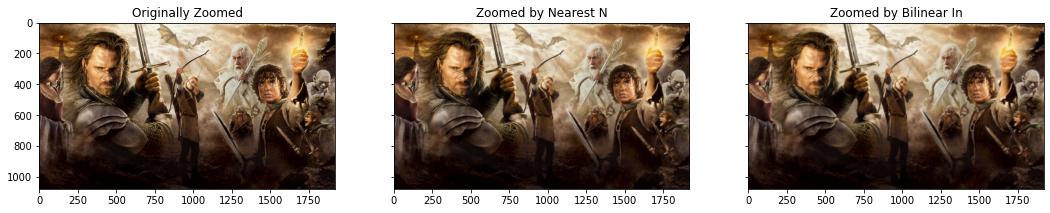

SSD with Neareat Neighbour method = 194613476
SSD with Bilinear Interpolation method = 193175091


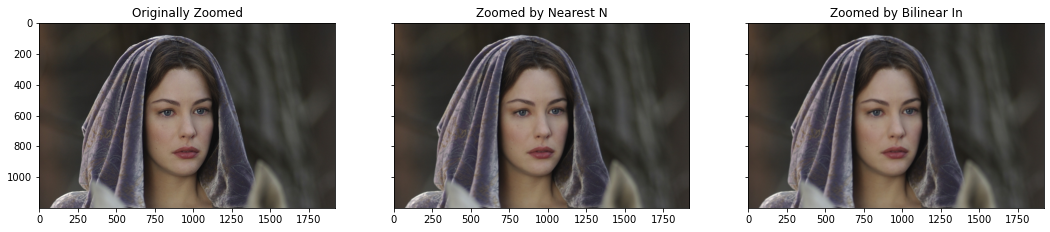

SSD with Neareat Neighbour method = 82266716
SSD with Bilinear Interpolation method = 73840839


In [41]:
#Nearest Neighbour
def nearest_neighbour_method(image,factor): #specify the image you want to enlarge and the factor for enlargement
    near_Img=cv.resize(image,None,fx=factor,fy=factor,interpolation=cv.INTER_NEAREST)
    return near_Img

#Bilinear Interpolation
def bilinear_Interpolation_Method(image,factor):
    bilinear_Img=cv.resize(image,None,fx=factor,fy=factor,interpolation=cv.INTER_LINEAR)
    return bilinear_Img

#SSD
def SSD(image,zoomed):
    difference=np.subtract(image,zoomed)
    square=np.square(difference)
    return np.sum(square)

images=[('Images/a1q5images/im01small.png','Images/a1q5images/im01.png'),('Images/a1q5images/im02small.png','Images/a1q5images/im02.png')]#,('Images/a1q5images/im03small.png','Images/a1q5images/im03.png')]
for i,j in images:
    image=cv.imread(i,cv.IMREAD_COLOR)
    imageBig=cv.imread(j,cv.IMREAD_COLOR)

    zoomNN=nearest_neighbour_method(image,4)
    zoomBI=bilinear_Interpolation_Method(image,4)

    fig,ax=plt.subplots(1,3,sharex='all',sharey='all',figsize=(18,6))
    ax[0].imshow(cv.cvtColor(imageBig,cv.COLOR_BGR2RGB))
    ax[0].set_title('Originally Zoomed')
    ax[1].imshow(cv.cvtColor(zoomNN,cv.COLOR_BGR2RGB))
    ax[1].set_title('Zoomed by Nearest N')
    ax[2].imshow(cv.cvtColor(zoomBI,cv.COLOR_BGR2RGB))
    ax[2].set_title('Zoomed by Bilinear In')
    plt.show()

    SSD_NN=SSD(imageBig.flatten(),zoomNN.flatten())
    SSD_BI=SSD(imageBig.flatten(),zoomBI.flatten())

    print("SSD with Neareat Neighbour method =",SSD_NN)
    print("SSD with Bilinear Interpolation method =",SSD_BI)

Q6) Sobel filter will produce the gradient of the image. There is an in-build a function filter 2D.
Implementing that funcion using nested loops produce an output which is not exactly what we expect. This shows the inefficiency of the method. 

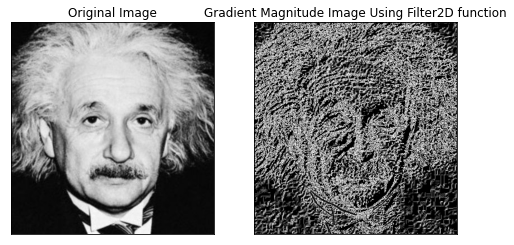

In [42]:

img=cv.imread(r"Images/einstein.png",cv.IMREAD_GRAYSCALE)
assert img is not None
kernel_v=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
img_x=cv.filter2D(img,-1,kernel_v)
kernel_h=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
img_y=cv.filter2D(img,-1,kernel_h)
grad_mag=np.sqrt(img_x**2+img_y**2)
fig,ax=plt.subplots(1,2,sharex='all',sharey='all',figsize=(8,8))
ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original Image')
ax[0].set_xticks([]) , ax[0].set_yticks([])
ax[1].imshow(grad_mag,cmap='gray')
ax[1].set_title('Gradient Magnitude Image Using Filter2D function')
plt.show()
for i in range(2):
    ax[i].axis('off')

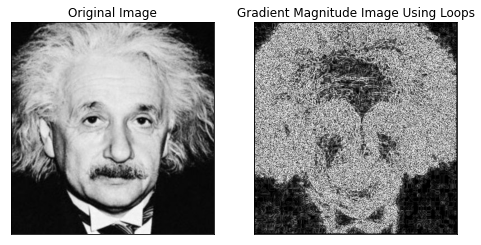

In [43]:
#own code for sobel filtering

def filter( image , kernel ):
    assert kernel.shape[0]%2 == 1 and kernel.shape[ 1 ]%2 == 1
    k_hh,k_hw=math.floor(kernel.shape[ 0 ]/2),math.floor(kernel.shape[ 1 ]/2)
    h,w = image.shape
    image_float = cv.normalize(image.astype('float') , None , 0.0 , 0.4,cv.NORM_MINMAX)
    result = np.zeros(image.shape, 'float')

    for m in range (k_hh,h-k_hh ):
        for n in range ( k_hw, w-k_hw):
            result[m,n]=np.dot(kernel.flatten(),image_float [m-k_hh:m+k_hh+1,n-k_hw:n+k_hw+1].flatten())
    return result

img=cv.imread(r"Images/einstein.png",cv.IMREAD_GRAYSCALE)
assert img is not None

kernel_v=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
imgb = filter( img , kernel_v )
imgb = imgb*255.0
imgb = imgb.astype ( np.uint8 )

kernel_h=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
imgc= filter(img,kernel_h)
imgc = imgc*255.0
imgc = imgc.astype ( np.uint8 )

grad_mag=np.sqrt(imgb**2+imgc**2)

fig,ax=plt.subplots(1,2,sharex='all',sharey='all',figsize=(8,8))
ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original Image')
ax[0].set_xticks([]) , ax[0].set_yticks([])
ax[1].imshow(grad_mag,cmap='gray')
ax[1].set_title('Gradient Magnitude Image Using Loops')
plt.show()
for i in range(2):
    ax[i].axis('off')

Q7) Segmentation masks are used to blur or sharpen background or/and foreground of a given image. By blurring the background which can be get from subtracting the segmentation mask from the original image, we can get a more enhanced version of the original image. 

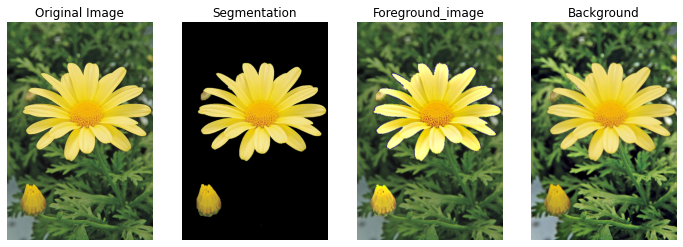

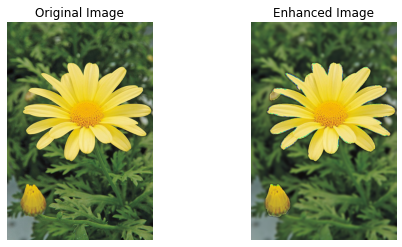

In [44]:
# Read the original image
original_image = cv.imread("Images/daisy.jpg",cv.IMREAD_COLOR)
assert original_image is not None

# Define boundary rectangle containing the foreground object
height, width,_ = original_image.shape
left_margin_proportion = 0.1
right_margin_proportion = 0.1
up_margin_proportion = 0.05
down_margin_proportion = 0.05

boundary_rectangle = (
    int(width * left_margin_proportion),int(height * up_margin_proportion),
    int(width * (1 - right_margin_proportion)), int(height * (1 - down_margin_proportion)),
)
# Set the seed for reproducibility purposes
cv.setRNGSeed(0)

# Initialize GrabCut mask image, that will store the segmentation results
mask = np.zeros((height, width), np.uint8)

# Arrays used by the algorithm internally
background_model = np.zeros((1, 65), np.float64)
foreground_model = np.zeros((1, 65), np.float64)

number_of_iterations = 20

grab_img = cv.grabCut(
    img=original_image,mask=mask,rect=boundary_rectangle,bgdModel=background_model,
    fgdModel=foreground_model, iterCount=number_of_iterations,mode=cv.GC_INIT_WITH_RECT,
)

grabcut_mask = np.where((mask == cv.GC_PR_BGD) | (mask == cv.GC_BGD), 0, 1).astype("uint8")
segmentation_mask = original_image.copy() * grabcut_mask[:, :, np.newaxis]
segmentation_mask_blured=cv.GaussianBlur(segmentation_mask,(5,5),cv.BORDER_CONSTANT)
background_portion=original_image-segmentation_mask
background_portion_blured=cv.GaussianBlur(background_portion,(5,5),cv.BORDER_CONSTANT)

# sigma = 5,15,25
blur_img = cv.GaussianBlur(background_portion, (0, 0), 100)
background_sharped = cv.addWeighted(background_portion, 1.5, blur_img, -0.5, 0)

blur_img2 = cv.GaussianBlur(segmentation_mask, (0, 0), 25)
flower_sharped = cv.addWeighted(segmentation_mask, 1.5, blur_img2, -0.5, 0)

foreground=flower_sharped+background_portion_blured
background=segmentation_mask_blured+background_sharped

fig,ax=plt.subplots(1,4,sharex='all',sharey='all',figsize=(12,4))
ax[0].imshow(cv.cvtColor(original_image,cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(segmentation_mask,cv.COLOR_BGR2RGB))
ax[1].set_title('Segmentation')
ax[2].imshow(cv.cvtColor(foreground,cv.COLOR_BGR2RGB))
ax[2].set_title('Foreground_image')
ax[3].imshow(cv.cvtColor(background,cv.COLOR_BGR2RGB))
ax[3].set_title('Background')
for i in range(4):
    ax[i].axis('off')
plt.show()
over_blured_background=cv.GaussianBlur(background_portion,(11,11),cv.BORDER_DEFAULT)
enhanced_foreground=segmentation_mask+over_blured_background
fig,ax=plt.subplots(1,2,sharex='all',sharey='all',figsize=(8,4))
ax[0].imshow(cv.cvtColor(original_image,cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(enhanced_foreground,cv.COLOR_BGR2RGB))
ax[1].set_title('Enhanced Image')
for i in range(2):
    ax[i].axis('off')


The background just beyond the edge of the flower quite dark because the flower is the segmentation mask for the image. When masking some of the pixels in the borders may be missed and results in dark borders.  